<a href="https://colab.research.google.com/github/SoheliPaul/Machine-Learning/blob/main/Lab6_2348561.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import threading
import warnings
import seaborn as sns

In [40]:
data=pd.read_csv('/content/insurance - insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [41]:
data.shape

(1338, 7)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [43]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [44]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [45]:
numerical=data[['age','bmi','children','charges']]

In [46]:
categorical=data[['sex','smoker', 'region']]

In [47]:
from sklearn.preprocessing import LabelEncoder
for col in categorical.columns:
  le=LabelEncoder()
  categorical[col]=le.fit_transform(categorical[col])

<ipython-input-47-7aa994af3bc9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[col]=le.fit_transform(categorical[col])
<ipython-input-47-7aa994af3bc9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[col]=le.fit_transform(categorical[col])
<ipython-input-47-7aa994af3bc9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [48]:
newdata=pd.concat([numerical, categorical], axis=1)
newdata.head()

,age,bmi,children,charges,sex,smoker,region
0,19,27.900,0,16884.92400,0,1,3
1,18,33.770,1,1725.55230,1,0,2
2,28,33.000,3,4449.46200,1,0,2
3,33,22.705,0,21984.47061,1,0,1
4,32,28.880,0,3866.85520,1,0,1


In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(newdata.drop('charges',axis=1),data['charges'],test_size=None,random_state=0)
X_train.shape,X_test.shape

((1003, 6), (335, 6))

In [50]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [51]:
model.fit(X_train, y_train)

LinearRegression()

In [52]:
coefficients=model.coef_
features_names=X_train.columns
feature_importance_df=pd.DataFrame({'Feature':features_names,'Coefficient':coefficients})
feature_importance_df['Absolute_Coefficient']=abs(feature_importance_df['Coefficient'])
feature_importance_df=feature_importance_df.sort_values(by='Absolute_Coefficient',ascending=False)
print(feature_importance_df)

    Feature   Coefficient  Absolute_Coefficient
4    smoker  23602.116067          23602.116067
2  children    450.147445            450.147445
5    region   -341.244000            341.244000
1       bmi    322.881906            322.881906
0       age    250.537556            250.537556
3       sex      3.650921              3.650921


In [14]:
X_train_prediction = model.predict(X_train)


In [15]:
X_test_prediction = model.predict(X_test)


In [16]:
y_pred = model.predict(X_test)


In [17]:
from sklearn.metrics import mean_absolute_error as mae
# calculate MAE
error = mae(y_test, y_pred)

# display
print("Mean absolute error : " + str(error))

Mean absolute error : 3998.2715408869753


In [18]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error:"+str(mse))

Mean Squared Error:32073628.56010921


In [19]:
import math
rmse = math.sqrt(mse)
print("The difference between actual and predicted values or Root mean squared error:", rmse)

The difference between actual and predicted values or Root mean squared error: 5663.358417062195


In [20]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.7962732059725786


In [21]:
import statsmodels.api as sm
X = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

#display adjusted R-squared
print(model.rsquared_adj)


0.8671361316356146


In [22]:
print(model.summary())

# residual sum of squares
print(model.ssr)

                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.868
Model:                            OLS   Adj. R-squared (uncentered):              0.867
Method:                 Least Squares   F-statistic:                              1092.
Date:                Mon, 18 Sep 2023   Prob (F-statistic):                        0.00
Time:                        13:59:23   Log-Likelihood:                         -10225.
No. Observations:                1003   AIC:                                  2.046e+04
Df Residuals:                     997   BIC:                                  2.049e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [25]:
from sklearn.metrics import explained_variance_score
explained_var=explained_variance_score(y_test, y_pred)
print(f"Explained Variance Score: {explained_var:.2f}")

Explained Variance Score: 0.80


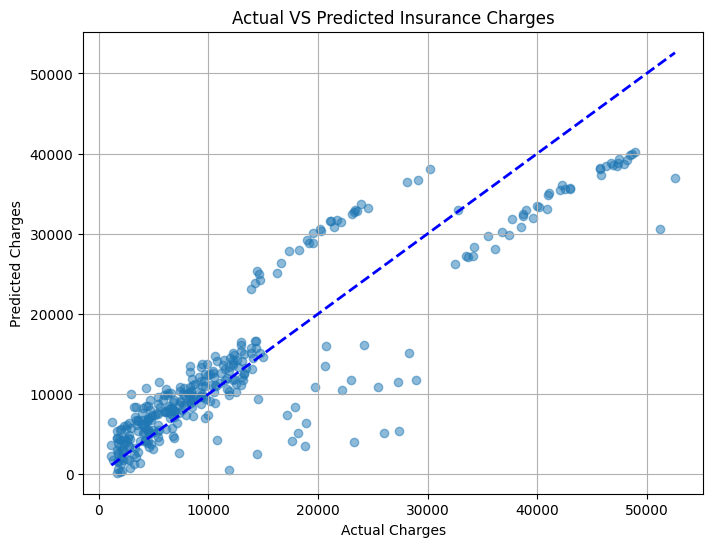

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,alpha=0.5)
plt.title('Actual VS Predicted Insurance Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.grid(True)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],linestyle='--',color='blue',linewidth=2)
plt.show()